In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import gridspec
#input data

df=input_data.read_data_sets('/tmp/data/',one_hot=True)

#parameter 
img_dim=784 #28*28=784

gen_dim=256

dis_dim=256

noise_dim=100

gen_input=tf.placeholder(tf.float32,shape=[None,noise_dim])

dis_input=tf.placeholder(tf.float32,shape=[None,img_dim])

batch_size=128

num_step=40000

learning_rate=2e-4

display_step=2000

def weight_init(shape):
    return tf.random_normal(shape=shape , stddev=1./tf.sqrt(shape[0]/2.))

#weight and bias
W={"w1":tf.Variable(weight_init([noise_dim,gen_dim])),
   "w2":tf.Variable(weight_init([gen_dim,img_dim])),
   "w3":tf.Variable(weight_init([img_dim,dis_dim])),
   "w4":tf.Variable(weight_init([dis_dim,1]))}

b={"b1":tf.Variable(tf.zeros([gen_dim])),
   "b2":tf.Variable(tf.zeros([img_dim])),
   "b3":tf.Variable(tf.zeros([dis_dim])),
   "b4":tf.Variable(tf.zeros([1]))}

#model architecture
def gen_fun(x):
    li=tf.add(tf.matmul(x,W["w1"]),b['b1'])
    li=tf.nn.relu(li)
    li=tf.add(tf.matmul(li,W["w2"]),b['b2'])
    li=tf.nn.sigmoid(li)
    return li


def dis_fun(x):
    l2=tf.add(tf.matmul(x,W["w3"]),b['b3'])
    l2=tf.nn.relu(l2)
    l2=tf.add(tf.matmul(l2,W["w4"]),b['b4'])
    l2=tf.nn.sigmoid(l2)
    return l2

#cost function optimization and model evaluation

gen_out=gen_fun(gen_input)

dis_real_out=dis_fun(dis_input)

dis_fake_out=dis_fun(gen_out)

cost_gen=-tf.reduce_mean(tf.log(dis_fake_out + .00001))

cost_dis=-tf.reduce_mean(tf.log(dis_real_out + .00001) + tf.log(1. - dis_fake_out + .00001))

var_gen =[W['w1'],W['w2'],b['b1'],b['b2']]
var_dis=[W['w3'],W['w4'],b['b3'],b['b4']]

training_gen=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_gen,var_list=var_gen)

training_dis=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_dis,var_list=var_dis)


#initialize the variable
init=tf.global_variables_initializer()
dl1=[]
gl1=[]
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_step+1):
        
        batch_x,_=df.train.next_batch(batch_size)
        
        #generate the noisr sample
        
        noise_temp=np.random.uniform(-1.,1.,size=[batch_size,noise_dim])
        
        feed_dict={dis_input:batch_x,gen_input:noise_temp}
        
        _,_,gl,dl=sess.run([training_gen,training_dis,cost_gen,cost_dis],feed_dict=feed_dict)
        dl1.append(dl)
        gl1.append(gl)
        
        if step % display_step==0 or step==1 :
            
            
            print('step-%i : generator_loss-%f : discriminator_loss-%f' % (step , gl,dl))
            
    print('optimization finished')
    
    n=6
    convas=np.zeros((28*n,28*n))
    
    for i in range(n):
        
        z=np.random.uniform(-1.,1.,size=[n,noise_dim])
        
        g=sess.run(gen_out,feed_dict={gen_input:z})
        
        g=-1*(g-1)
        for j in range(n):
             convas[i*28:(i+1)*28,j*28:(j+1)*28]=g[j].reshape([28,28])
    
    plt.imshow(convas,origin='upper',cmap='gray')
    plt.show()
    
    
   
        
        
        
        


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
step-1 : generator_loss-1.538154 : discriminator_loss-1.115221
step-2000 : generator_loss-4.927309 : discriminator_loss-0.029573
step-4000 : generator_loss-4.684269 : discriminator_loss-0.029839
step-6000 : generator_loss-4.199564 : 

<Figure size 640x480 with 1 Axes>

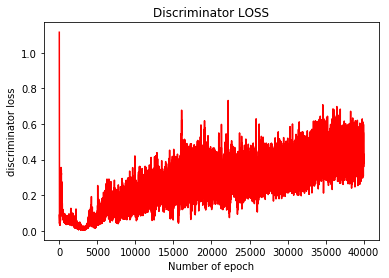

In [13]:
import matplotlib.pyplot as plt
#f1 = plt.figure()
#f2 = plt.figure()
#ax1 = f1.add_subplot(111)
#ax1.plot(gl1)
plt.title('Discriminator LOSS')
plt.xlabel('Number of epoch')
plt.ylabel('discriminator loss')
#ax2 = f2.add_subplot(111)
#ax2.plot(dl1)
#plt.show()
plt.plot(dl1 , color='red')
#plt.plot(dl1)